In [1]:
### Let's build a convolutional neural network for the 3-label classification ###

In [6]:
# import modules
import pandas as pd
import numpy as np
import cv2 as cv
from IPython.display import clear_output
import matplotlib.pyplot as plt

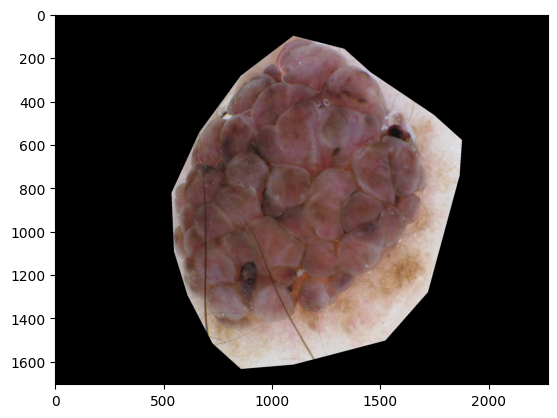

In [3]:
# Load training data csv. The original file contains the images names and patient data
training_data_csv = pd.read_csv('../merged_training_data.csv')
training_data_csv.head()

# Load an image and mask
img = cv.imread('../../ISIC-2017_Training_Data/ISIC_0000100.jpg',-1) 
mask = cv.imread('../../ISIC-2017_Training_Part1_GroundTruth/ISIC_0000100_segmentation.png',-1)

# Color conversion and normalization
output_array = np.zeros((img.shape[0],img.shape[1])) # Array to store normalized image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

## Segmentation
segmented = cv.normalize(cv.bitwise_and(img, img, mask=mask),  output_array, 0, 255, cv.NORM_MINMAX)
plt.imshow(segmented);

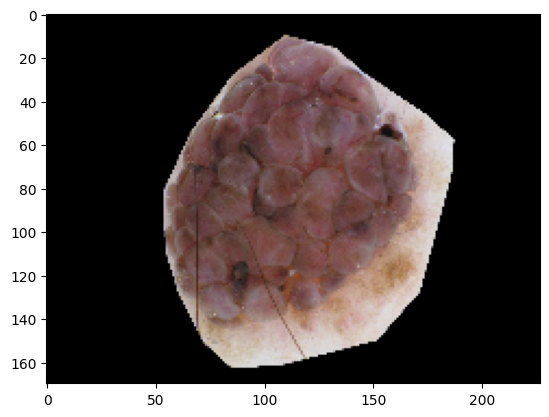

In [4]:
half = cv.resize(segmented, (0, 0), fx = 0.1, fy = 0.1)
plt.imshow(half)

In [5]:
### Segment, normalize and resize each image
im_path = '../../ISIC-2017_Training_Data/' ## CHANGE THIS VARIABLE WITH THE PATH WHERE YOU HAVE THE IMAGES
mask_path = '../../ISIC-2017_Training_Part1_GroundTruth/' ## CHANGE THIS VARIABLE WITH THE PATH WHERE THE MAKS ARE

## function to segment, normalize, resize and save images
for index, image in enumerate(training_data_csv['image_id']):
    
    # read
    img = cv.imread(im_path + image + '.jpg',-1) 
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    # segment & resize
    mask = cv.imread(mask_path + image + '_segmentation.png', -1)    
    output_array = np.zeros((img.shape[0],img.shape[1])) # Array to store normalized image
    
    ### resize the segmented image to 10% of the original size
    img_segmented = cv.resize(cv.normalize(cv.bitwise_and(img_rgb, img_rgb, mask=mask),  output_array, 0, 255, cv.NORM_MINMAX),
                              (0, 0), fx = 0.1, fy = 0.1)
    
    # save the images in a folder call segmented, two levels up the cd
    cv.imwrite('../../segmented/SEG' + image + '.jpg' , cv.cvtColor(img_segmented, cv.COLOR_RGB2BGR))
    clear_output(wait=True)
    print('Segmented image ' + str(index+1) + '/'+ str(len(training_data_csv['image_id'])) + ' saved.')

segmented image 1999/2000 saved.
